<a href="https://colab.research.google.com/github/sugamkhadka40-rgb/Sugam-Khadka-CPSMA-3933-01/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Redo WW Set 03 Problem 3.
This problem asks to maximize $P = 3x + 2y$ given a set of constraints.

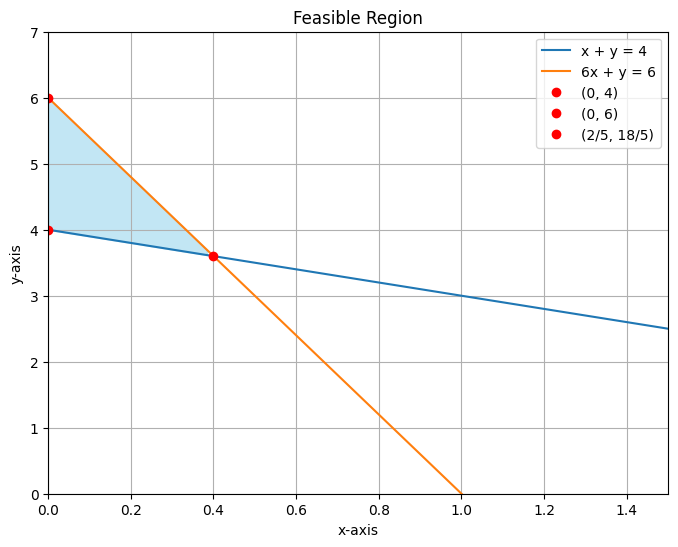

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)

y1 = 4 - x
y2 = 6 - 6*x

plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='x + y = 4')
plt.plot(x, y2, label='6x + y = 6')

plt.fill_between(x, y1, y2, where=(y2 > y1), color='skyblue', alpha=0.5)

plt.plot(0, 4, 'ro', label='(0, 4)')
plt.plot(0, 6, 'ro', label='(0, 6)')
plt.plot(2/5, 18/5, 'ro', label='(2/5, 18/5)')

plt.xlim(0, 1.5)
plt.ylim(0, 7)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Feasible Region')
plt.grid(True)
plt.legend()
plt.show()

The linprog function from the scipy library is a standard tool for this. The main thing to remember is that it minimizes by default, so we give it the negative of our objective function's coefficients to find the maximum.

In [6]:
from scipy.optimize import linprog

c = [-3, -2]

A_ub = [
    [6, 1],
    [-1, -1]
]
b_ub = [6, -4]

x_bounds = (0, None)
y_bounds = (0, None)

result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=[x_bounds, y_bounds])

if result.success:
    optimal_x, optimal_y = result.x
    max_value = -result.fun

    print(f"Optimal solution found:")
    print(f"x = {optimal_x:.2f}")
    print(f"y = {optimal_y:.2f}")
    print(f"Maximum P value = {max_value:.2f}")
else:
    print("Solver could not find a solution.")

Optimal solution found:
x = 0.00
y = 6.00
Maximum P value = 12.00


The output confirms the maximum value of 12 is at the point (0, 6).

Part 2: Redo WW Set 04 Problem 6.
This is the snowboard manufacturing problem where we want to maximize revenue. Let $d$ = deluxe models and $s$ = standard models.

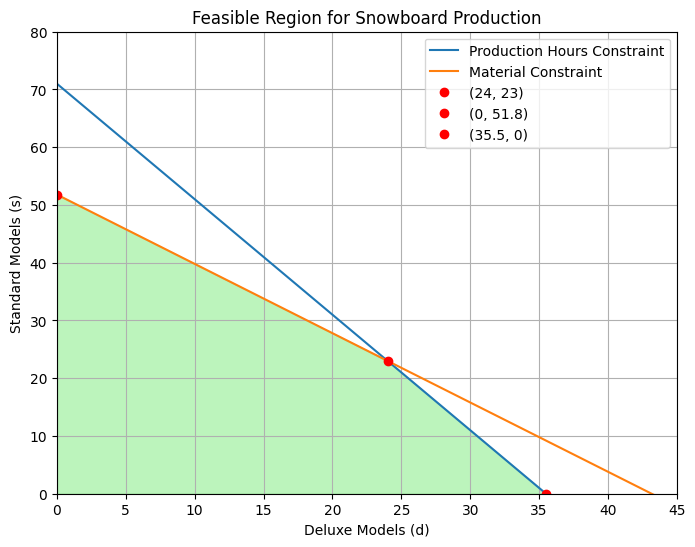

In [7]:
import numpy as np
import matplotlib.pyplot as plt

d = np.linspace(0, 50, 100)

s1 = (852 - 24*d) / 12
s2 = (3885 - 90*d) / 75

plt.figure(figsize=(8, 6))
plt.plot(d, s1, label='Production Hours Constraint')
plt.plot(d, s2, label='Material Constraint')

feasible_s = np.minimum(s1, s2)
plt.fill_between(d, feasible_s, color='lightgreen', alpha=0.6, where=(feasible_s >= 0))

plt.plot(24, 23, 'ro', label='(24, 23)')
plt.plot(0, 51.8, 'ro', label='(0, 51.8)')
plt.plot(35.5, 0, 'ro', label='(35.5, 0)')

plt.xlim(0, 45)
plt.ylim(0, 80)
plt.xlabel('Deluxe Models (d)')
plt.ylabel('Standard Models (s)')
plt.title('Feasible Region for Snowboard Production')
plt.grid(True)
plt.legend()
plt.show()

Solving with SciPy
Again, we use linprog to find the optimal number of deluxe and standard models.

In [8]:
from scipy.optimize import linprog

c = [-280, -200]

A_ub = [
    [24, 12],
    [90, 75]
]
b_ub = [852, 3885]

d_bounds = (0, None)
s_bounds = (0, None)

result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=[d_bounds, s_bounds])

if result.success:
    deluxe_models, standard_models = result.x
    max_revenue = -result.fun

    print(f"Optimal production plan:")
    print(f"Deluxe Models (d) = {deluxe_models:.0f}")
    print(f"Standard Models (s) = {standard_models:.0f}")
    print(f"Maximum Revenue = ${max_revenue:,.2f}")
else:
    print("Solver could not find a solution.")

Optimal production plan:
Deluxe Models (d) = 24
Standard Models (s) = 23
Maximum Revenue = $11,320.00


The output confirms that the maximum revenue of $11,320 is achieved by producing 24 deluxe and 23 standard models.